In [25]:
import sqlite3
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute("select attraction,strftime('%H:%M:%S',timestamp) from checkin where VisitorId='165316' and type='actual';")
counts1 = c.fetchall()
#print(counts1)

x1=[83,22,15,81,4]
#x1=[2,30,16,17,5]


c.execute("select attraction,strftime('%H:%M:%S',timestamp) from checkin where VisitorId='1835254' and type='actual';")
counts2 = c.fetchall()
#print(counts2)

x2=[84,28,7,22,63]
#x2=[6,32,7,19,4]


c.execute("select attraction,strftime('%H:%M:%S',timestamp) from checkin where VisitorId='296394' and type='actual';")
counts3 = c.fetchall()
#print(counts3)

x3=[83,5,23,64,13]
#x3=[64,6,23,64,13]


c.execute("select attraction,strftime('%H:%M:%S',timestamp) from checkin where VisitorId='404385' and type='actual';")
counts4 = c.fetchall()
#print(counts4)

x4=[85,32,27,25,28]
#x4=[64,13,81,6,30]


c.execute("select attraction,strftime('%H:%M:%S',timestamp) from checkin where VisitorId='448990' and type='actual';")
counts5 = c.fetchall()
#print(counts5)
x5=[83,5,23,64,13]

A=np.array([x1,x2,x3,x4,x5])
# A是一个向量矩阵：euclidean代表欧式距离
distA=pdist(A,metric='euclidean')
# 将distA数组变成一个矩阵
distB = squareform(distA)

print(A)
print(distA)
print(distB)

[[83 22 15 81  4]
 [84 28  7 22 63]
 [83  5 23 64 13]
 [85 32 27 25 28]
 [83  5 23 64 13]]
[84.04165634 26.88865932 62.92853089 26.88865932 71.06335202 40.63249931
 71.06335202 49.94997497  0.         49.94997497]
[[ 0.         84.04165634 26.88865932 62.92853089 26.88865932]
 [84.04165634  0.         71.06335202 40.63249931 71.06335202]
 [26.88865932 71.06335202  0.         49.94997497  0.        ]
 [62.92853089 40.63249931 49.94997497  0.         49.94997497]
 [26.88865932 71.06335202  0.         49.94997497  0.        ]]


In [111]:
import copy
import pandas as pd
from pandas.plotting import parallel_coordinates

c.execute("select strftime('%H',timestamp)+1 as ckhour,count(strftime('%H',timestamp)),name as count from checkin as ch,attraction where ch.type='actual' and attraction=AttractionID and category like '%Rides%' group by ckhour,name order by name,ckhour;")
counts = c.fetchall()

#names: all attration names whose category is 'Rides'
#data: dictionary to hold all attrations' checkin count in each single hour.
names=[]
data={}

#column: list to hold all hour number from 9-24
#attrbute: dictionary to hold all attractions' hour number who has actual checkin records.
column=[]
attribute={}
for each in counts:
    #print(each)
    if each[0] not in column:
        column.append(each[0])
    
    if each[2] not in names:
        names.append(each[2])
        data[each[2]]=list()
        attribute[each[2]]=list()
    data[each[2]].append(each[1])
    attribute[each[2]].append(each[0])
    

#将缺失的整点及其访问数补齐
for i in range(len(names)):
    for j in range(9,len(column)+9):
        if j not in attribute[names[i]]:
            attribute[names[i]].insert(j-9,j)
            data[names[i]].insert(j-9, 'Null')
    #print(attribute[names[i]])
    #print(data[names[i]])
    
df0=pd.DataFrame.from_dict(dict(data, orient='index', columns=column))
pd.DataFrame(df0.values.T, index=df0.columns, columns=df0.index)
#df=pd.DataFrame(df0.values.T, index=df0.columns, columns=df0.index)
#parallel_coordinates(df,'orient')
#plt.gca().legend_.remove()
#plt.show()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Atmosfear,998,1840,1568,1685,1688,1750,1446,1218,1479,1450,1102,973,625,309,135,Null
Auvilotops Express,955,1689,1624,1848,1621,1589,1634,1518,1600,1293,1313,1010,475,385,132,Null
Beelzebufo,220,355,379,414,439,357,337,237,275,323,319,99,84,125,Null,Null
Blue Iguanodon,198,288,315,457,337,345,291,276,378,302,286,192,33,201,17,Null
Cyndisaurus Asteroid,195,427,375,361,379,361,303,261,313,225,225,114,46,149,8,Null
Dykesadactyl Thrill,342,494,402,518,471,553,462,525,396,383,396,275,165,166,29,Null
Eberlesaurus Roundup,236,533,490,509,522,415,464,300,437,331,344,217,124,99,17,Null
Enchanted Toadstools,240,405,230,381,384,362,226,200,265,311,218,260,128,124,10,Null
Firefall,1008,1647,1560,1282,1240,1249,1167,1094,1279,1188,1172,1076,452,317,268,Null
Flight of the Swingodon,957,1951,1254,1322,1259,1315,1180,1146,1332,1200,1170,915,481,429,149,Null


[(18266, 'Atmosfear'), (18686, 'Auvilotops Express'), (3963, 'Beelzebufo'), (3916, 'Blue Iguanodon'), (3742, 'Cyndisaurus Asteroid'), (5577, 'Dykesadactyl Thrill'), (5038, 'Eberlesaurus Roundup'), (3744, 'Enchanted Toadstools'), (15999, 'Firefall'), (16060, 'Flight of the Swingodon'), (3632, 'Flying TyrAndrienkos'), (18715, 'Galactosaurus Rage'), (25009, 'Ichthyoroberts Rapids'), (3751, 'Jeredactyl Jump'), (5236, 'Jurassic Road'), (5310, "Kauf's Lost Canyon Escape"), (18790, 'Keimosaurus Big Spin'), (5638, 'Kristanodon Kaper'), (5514, 'Maiasaur Madness'), (3589, 'North Line'), (5500, 'Paleocarrie Carousel'), (5544, 'Raptor Race'), (4898, 'Rhynasaurus Rampage'), (4052, 'Sauroma Bumpers'), (5208, 'Scholtz Express'), (5002, 'Squidosaur'), (3919, 'Stegocycles'), (3867, 'Stone Cups'), (14401, 'TerrorSaur'), (15574, 'Wendisaurus Chase'), (4016, 'Wild Jungle Cruise'), (18695, 'Wrightiraptor Mountain')]


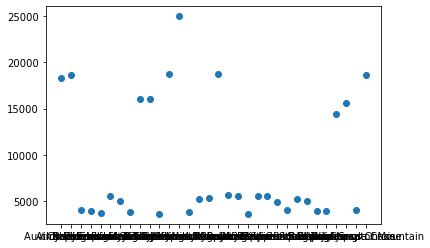

In [118]:
import matplotlib.pyplot as plt

c.execute("select count(visitorid) as count,name from checkin as ch,attraction where ch.type='actual' and category like '%Rides%' and attraction=AttractionID group by name order by name;")
counts = c.fetchall()

print(counts)
df=pd.DataFrame.from_records(counts,columns=['count','name'])
plt.scatter(df['name'],df['count'])
plt.show()